In [36]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [37]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Canny.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-37-93a940a92dd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-37-93a940a92dd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.008028,0.007456,0.009000,0.008800,0.007113,0.004822,0.006770,0.007542,0.008886,0.005653,...,0.006798,0.007628,0.009714,0.014959,0.011284,0.007485,0.004994,0.007485,0.009943,1
1,0.010571,0.009029,0.007656,0.006140,0.006798,0.009457,0.005138,0.008514,0.006197,0.006398,...,0.012681,0.010085,0.008057,0.012368,0.018170,0.014845,0.013279,0.015244,0.012681,1
2,0.026237,0.023581,0.021940,0.022818,0.020836,0.025644,0.023157,0.024655,0.020581,0.024175,...,0.024260,0.021742,0.022195,0.028352,0.027083,0.024966,0.022535,0.019362,0.023383,1
3,0.009628,0.009800,0.016551,0.017943,0.018880,0.019135,0.019022,0.017034,0.015926,0.017858,...,0.000000,0.000000,0.000000,0.000000,0.000058,0.000000,0.000000,0.000000,0.000000,1
4,0.031194,0.029506,0.025757,0.026688,0.025983,0.026321,0.031785,0.028380,0.025136,0.022790,...,0.035069,0.029366,0.022054,0.021063,0.018256,0.020836,0.026829,0.022931,0.025842,1


In [38]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

In [39]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8452380952380952
              precision    recall  f1-score   support

          -1       0.92      0.89      0.91       142
           1       0.50      0.58      0.54        26

    accuracy                           0.85       168
   macro avg       0.71      0.74      0.72       168
weighted avg       0.86      0.85      0.85       168



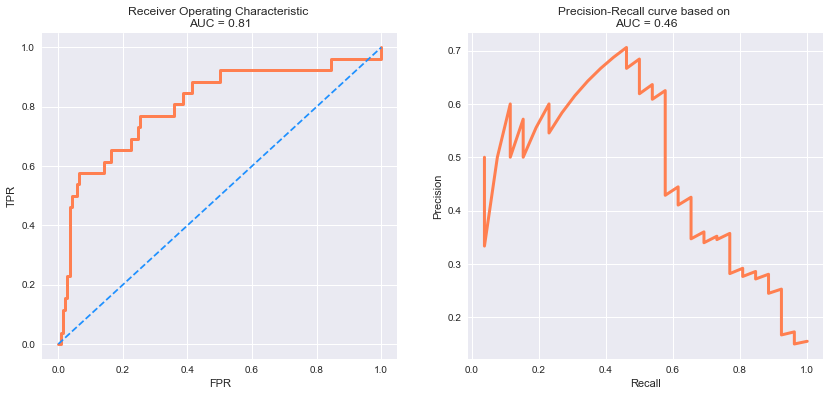

In [40]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()